In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('retail_sales_dataset.csv')
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
data.shape

(1000, 9)

In [5]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

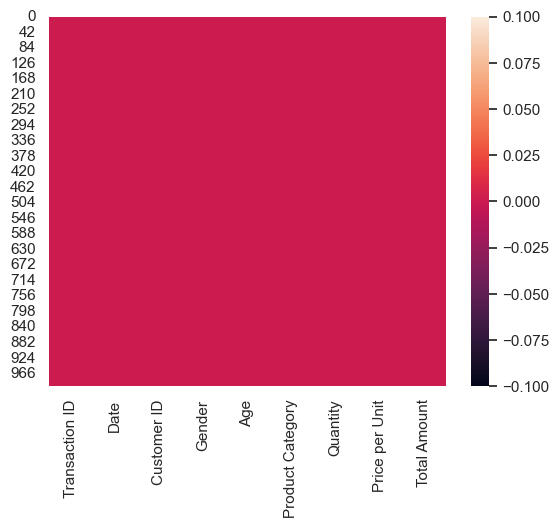

In [6]:
sns.heatmap(data.isnull())
plt.show()

In [7]:
data=data.drop(['Transaction ID','Customer ID'],axis=1)
data.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100


In [8]:
data['Date']=pd.to_datetime(data['Date'])

In [9]:
data.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Gender            1000 non-null   object        
 2   Age               1000 non-null   int64         
 3   Product Category  1000 non-null   object        
 4   Quantity          1000 non-null   int64         
 5   Price per Unit    1000 non-null   int64         
 6   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 54.8+ KB


In [11]:
data['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

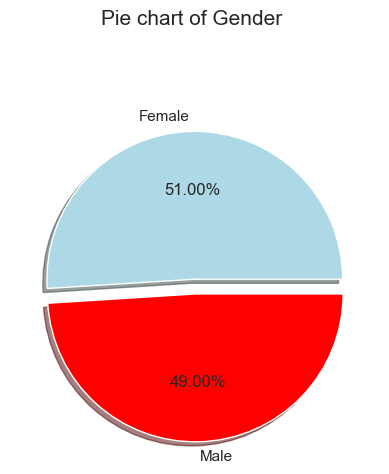

In [12]:
plt.pie(
    data['Gender'].value_counts(),
    autopct="%.2f%%",
    labels=(data['Gender'].value_counts().index),
    colors=['lightblue','red'],
    explode=[0,0.1],
    shadow=True,
    
)
plt.title("Pie chart of Gender ", pad=50, fontsize=15, fontweight=50)
plt.show()

In [13]:
data['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

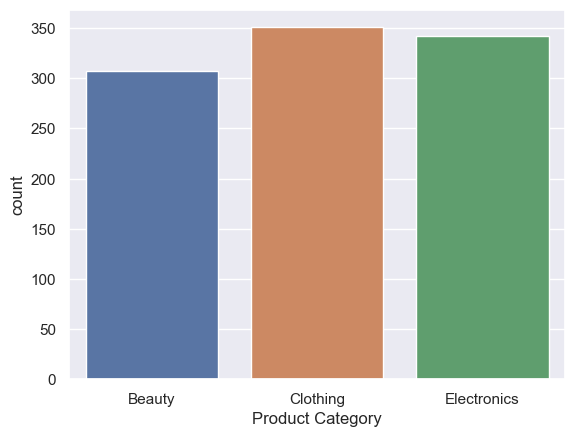

In [14]:
sns.countplot(data,x='Product Category',hue='Product Category')
plt.show()

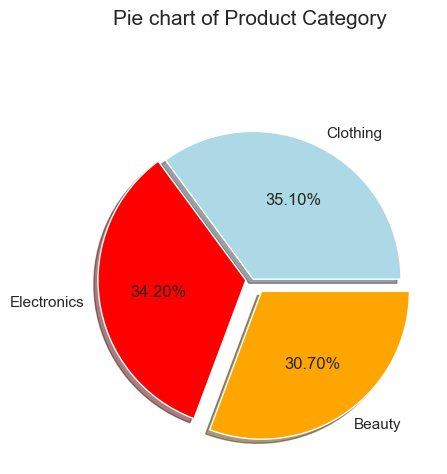

In [15]:
plt.pie(
    data['Product Category'].value_counts(),
    autopct="%.2f%%",
    labels=(data['Product Category'].value_counts().index),
    colors=['lightblue','red','orange'],
    explode=[0,0.05,0.1],
    shadow=True,
    
)
plt.title("Pie chart of Product Category ", pad=50, fontsize=15, fontweight=50)
plt.show()

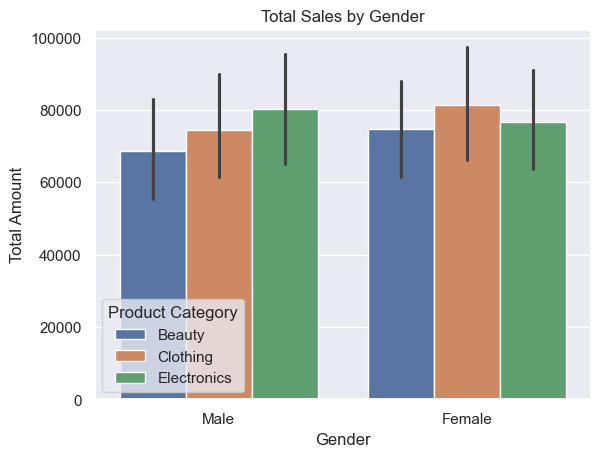

In [16]:
sns.barplot(data=data, x='Gender', y='Total Amount', estimator=sum,hue='Product Category')
plt.title('Total Sales by Gender')
plt.show()


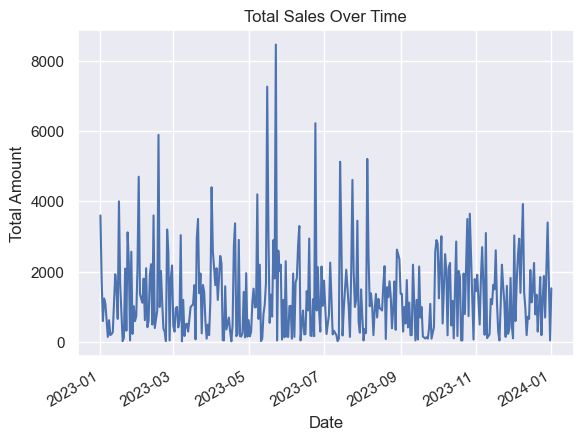

In [17]:
data.groupby('Date')['Total Amount'].sum().plot(kind='line')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()


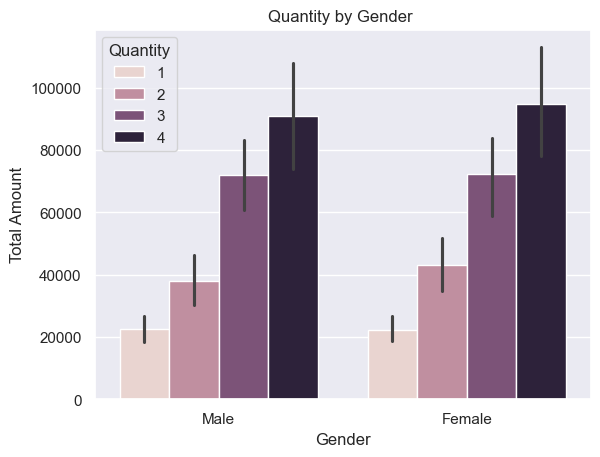

In [18]:
sns.barplot(data=data, x='Gender', y='Total Amount', estimator=sum,hue='Quantity')
plt.title('Quantity by Gender ')
plt.show()


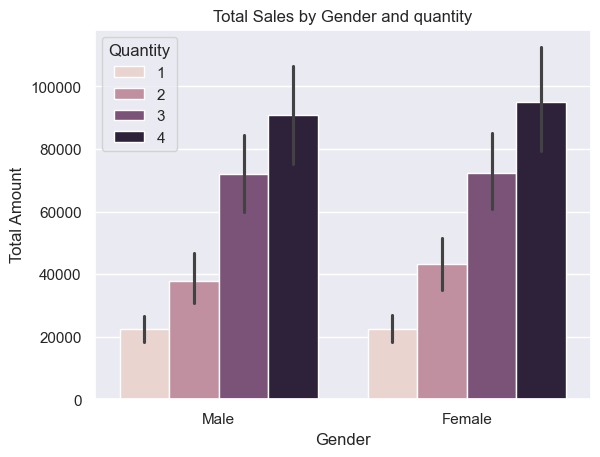

In [19]:
sns.barplot(data=data, x='Gender', y='Total Amount', estimator=sum,hue='Quantity')
plt.title('Total Sales by Gender and quantity')
plt.show()
